MLP FROM DEEP LEARNING MODEL 

# INSTALLING AND IMPORTING LIBRARIES

In [1]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [36]:
from keras.models import Sequential,load_model
from keras.layers import Dense


import numpy as np
import pandas as pd 
import os 
import seaborn as sns


# loading libraries

In [8]:
df = pd.read_csv(r"C:\Users\dell\Desktop\DATASETS\diabetes.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [13]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
df = df.drop(['SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'],axis=1)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,Age,Outcome
0,6,148,72,50,1
1,1,85,66,31,0
2,8,183,64,32,1
3,1,89,66,21,0
4,0,137,40,33,1


In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.239528,0.065068
Age,0.544341,0.263514,0.239528,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.238356,1.000000


In [24]:
df.shape

(768, 5)

<Axes: >

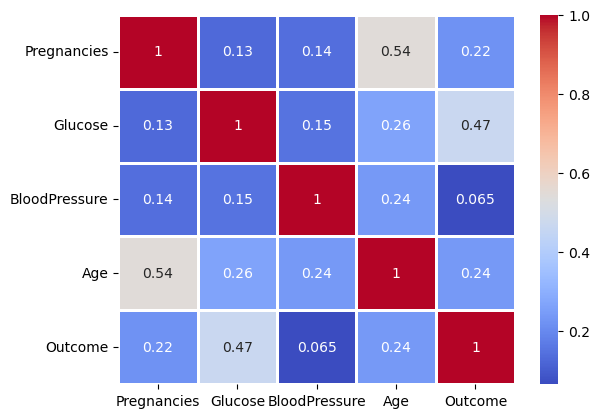

In [18]:
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=1,annot=True)

# SPLITTING AND TRAINING


In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Age', 'Outcome'], dtype='object')

In [20]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)


# MODEL BUILDING

In [22]:
model = Sequential()
model.add(Dense(12,activation='relu',input_dim=4,kernel_initializer='uniform'))  # activation is 2 types: 'relu','tan h'
model.add(Dense(4,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100,batch_size=10,verbose=1)
scores = model.evaluate(x_test,y_test)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5546 - loss: 0.6904
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - loss: 0.6678
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - loss: 0.6543
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6640 - loss: 0.6532
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - loss: 0.6610
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6977 - loss: 0.6228
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6477 - loss: 0.6382
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - loss: 0.6181
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7154 - loss: 0.5885
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6679 - loss: 0.6050
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 0.6046
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [26]:
model.metrics_names

['loss', 'compile_metrics']

In [27]:
print("%s : %0.2f%%"%(model.metrics_names[1],scores[1]*100))

compile_metrics : 78.57%


# conclusion

In [28]:
x.head()

,Pregnancies,Glucose,BloodPressure,Age
0,6,148,72,50
1,1,85,66,31
2,8,183,64,32
3,1,89,66,21
4,0,137,40,33


In [29]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [39]:
input_data=[[6,148,72,50]]
input_data = np.array(input_data)
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.6249953]], dtype=float32)

In [40]:
input_data=[[1	,89	,66	,21]]
input_data = np.array(input_data)
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.10966806]], dtype=float32)